In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
#Step 1: Load the Data
import pandas as pd
import matplotlib.pyplot as plt

# Upload CSV manually in Colab or specify path
df = pd.read_csv("jobs.csv")
print("Data loaded with shape:", df.shape)

Data loaded with shape: (100000, 17)


In [4]:
#  Step 2: Preview the Data
df.head()

,jobTitle,companyName,lid,jobDescRaw,finalZipcode,finalState,finalCity,companyBranchName,jobDescUrl,nlpBenefits,nlpSkills,nlpSoftSkills,nlpDegreeLevel,nlpEmployment,nlpSeniority,correctDate,scrapedLocation
0,"Nuclear Medicine Tech, Full Time, Day Shift",Adventist Health,07213bcc5db0efec311b1884459defed,"<div class=""normalText""><p>Job Description</p>...",93465,"CA,",Templeton,"Adventist Health || Templeton, CA, 93465",https://www.postjobfree.com/job/vubjwa/nuclear...,[],"['Nuclear Medicine', 'Wound Care', 'Digestive ...",['Computer Literacy'],['Associates'],Full-time,Entry level,2025-01-06 00:00:00,"Templeton, CA, 93465"
1,Radiation Therapist - SIGN-ON BONUS,SkinCure Oncology,53994c1a47063a39ed3bf5509c0d6676,"<div class=""normalText""><p>Seeking Radiation T...",47802,"IN,",Terre Haute,"SkinCure Oncology || Terre Haute, IN, 47802",https://www.postjobfree.com/job/vt9qzu/radiati...,"['Vision Insurance', 'Life Insurance', 'Health...","['Radiation Therapy', 'Hair Loss', 'Radiation ...",['Customer Service'],"['Masters', 'Certificate']",Full-time,Entry level,2025-01-06 00:00:00,"Terre Haute, IN, 47802"
2,Delivery Driver - Earn Extra Cash,DoorDash,22ea5183b183b0ba1999b465cddc0364,"<div class=""-desktop-no-padding-top"" id=""job-d...",46403,IN,Hobart,"DoorDash || Hobart, IN",https://us.jora.com/job/Delivery-Driver-36f004...,[],[],[],[],Full-time,Entry level,2025-01-06 15:08:54,"Hobart, IN"
3,Paramedic,AMR,9255fae6f210f0ca9fdda3c32b99fc1e,"<div class=""-desktop-no-padding-top"" id=""job-d...",11791,NY,Bay Shore,"AMR || Bay Shore, NY",https://us.jora.com/job/Paramedic-30a825beca41...,[],"['Medical Equipment', 'Ambulances', 'Agility']",['Management'],['High School'],Full-time,Entry level,2025-01-06 06:32:50,"Bay Shore, NY"
4,Sales Lead - White House Black Market,Chico's,362836240b3a6ad18c342d840f569622,"<div class=""normalText""><p>Join our fashion-ob...",49315,"MI,",Byron Center,"Chico's || Byron Center, MI, 49315",https://www.postjobfree.com/job/vt7qu7/sales-l...,[],"['Appraisals', 'Cash Receipts', 'Product Knowl...","['Sales', 'Problem Solving', 'Organizational S...","['Associates', 'High School']",Full-time,Mid-Senior level,2025-01-05 00:00:00,"Byron Center, MI, 49315"


In [5]:
#  Step 3: Check Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   jobTitle           100000 non-null  object
 1   companyName        99675 non-null   object
 2   lid                100000 non-null  object
 3   jobDescRaw         100000 non-null  object
 4   finalZipcode       97949 non-null   object
 5   finalState         98580 non-null   object
 6   finalCity          98205 non-null   object
 7   companyBranchName  99675 non-null   object
 8   jobDescUrl         100000 non-null  object
 9   nlpBenefits        100000 non-null  object
 10  nlpSkills          100000 non-null  object
 11  nlpSoftSkills      100000 non-null  object
 12  nlpDegreeLevel     100000 non-null  object
 13  nlpEmployment      100000 non-null  object
 14  nlpSeniority       100000 non-null  object
 15  correctDate        99986 non-null   object
 16  scrapedLocation    10

In [6]:
#  Step 4: Check Missing Values
print("\n Missing values per column:")
print(df.isnull().sum())


 Missing values per column:
jobTitle                0
companyName           325
lid                     0
jobDescRaw              0
finalZipcode         2051
finalState           1420
finalCity            1795
companyBranchName     325
jobDescUrl              0
nlpBenefits             0
nlpSkills               0
nlpSoftSkills           0
nlpDegreeLevel          0
nlpEmployment           0
nlpSeniority            0
correctDate            14
scrapedLocation         0
dtype: int64


In [7]:
#  Step 5: Check for Duplicates
duplicates = df.duplicated().sum()
print(f"\n Duplicate rows: {duplicates}")


 Duplicate rows: 0



 Top 10 job titles:
jobTitle
delivery driver                                736
delivery driver - no experience needed         651
drive with doordash                            645
licensed psychologist                          622
delivery driver - earn extra cash              609
delivery driver - sign up and start earning    603
travel nurse rn - med surg - per week          500
physical therapist                             492
physician family practice                      471
restaurant delivery                            455
Name: count, dtype: int64


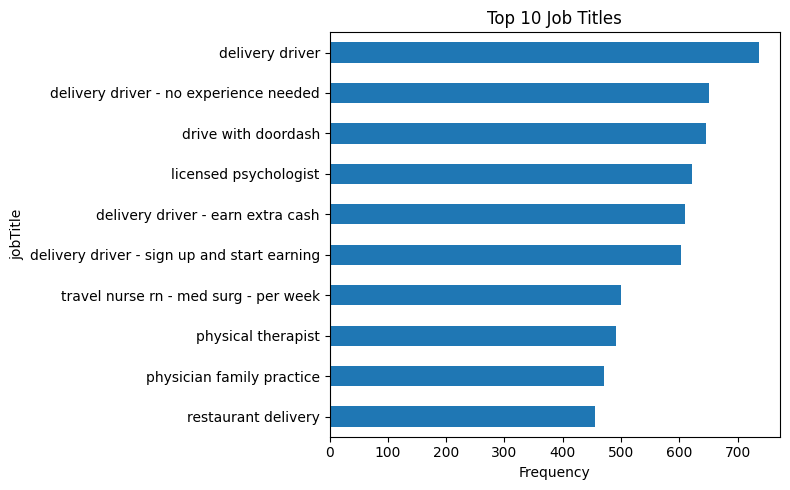

In [9]:
#  Step 6: Top Job Titles
df['jobTitle'] = df['jobTitle'].astype(str).str.strip().str.lower()
top_titles = df['jobTitle'].value_counts().head(10)
print("\n Top 10 job titles:")
print(top_titles)
top_titles.plot(kind='barh', figsize=(8, 5), title='Top 10 Job Titles')
plt.xlabel("Frequency")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


 Job description length stats:
count    100000.000000
mean       3894.747850
std        2321.626015
min           9.000000
25%        2288.000000
50%        3350.000000
75%        5140.000000
max       35528.000000
Name: desc_length, dtype: float64


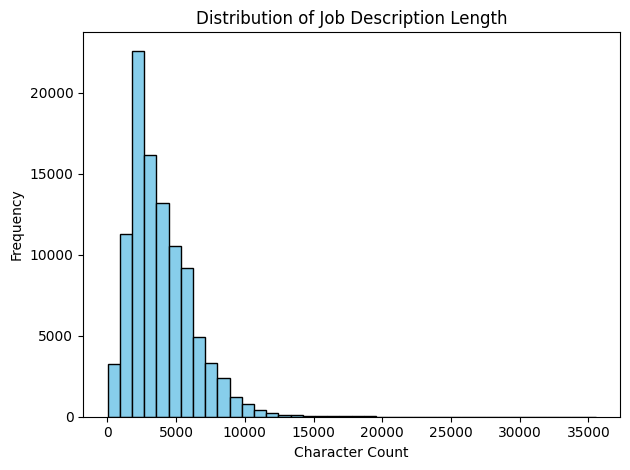

In [10]:
#  Step 7: Description Length
if 'jobDescRaw' in df.columns:
    df['jobDescRaw'] = df['jobDescRaw'].astype(str)
    df['desc_length'] = df['jobDescRaw'].apply(len)
    print("\n Job description length stats:")
    print(df['desc_length'].describe())

    plt.hist(df['desc_length'], bins=40, color='skyblue', edgecolor='black')
    plt.title("Distribution of Job Description Length")
    plt.xlabel("Character Count")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [14]:

#  Step 8: Observations
from IPython.display import Markdown as md

observations = '''
### 🔍 Summary of Key Findings:

- The dataset has **{} rows** and **{} columns**
- **{} duplicate rows** were found
- The most common job title is **{}**
- Description lengths range from **{}** to **{}** characters
- Job titles are **not standardized**, affecting duplicate detection
'''.format(
    df.shape[0],
    df.shape[1],
    duplicates,
    top_titles.index[0],
    int(df['desc_length'].min()) if 'desc_length' in df else 'N/A',
    int(df['desc_length'].max()) if 'desc_length' in df else 'N/A'
)

md(observations)



### 🔍 Summary of Key Findings:

- The dataset has **100000 rows** and **18 columns**
- **0 duplicate rows** were found
- The most common job title is **delivery driver**
- Description lengths range from **9** to **35528** characters
- Job titles are **not standardized**, affecting duplicate detection
